In [32]:
# install pycaret
# !pip3 install pycaret

In [36]:
import pandas as pd

In [37]:
data_classification = pd.read_csv('datasets/loan_train_data.csv')

In [38]:
data_classification.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,3510,38,12,61,91330,3,0.9,3,0,0,0,0,0,0
1,1129,30,5,171,94025,2,1.9,2,0,1,0,0,0,0
2,1637,65,39,100,92122,4,1.7,3,0,0,0,0,0,1
3,3165,28,4,82,95136,4,0.0,1,0,0,0,0,1,1
4,3563,32,8,169,94596,1,6.5,3,272,1,1,1,1,0


In [39]:
from pycaret.utils import version
version()

1.0.0


---

#### SETUP  

---

In [40]:
from pycaret import classification

In [47]:
classification_setup = classification.setup(data= data_classification, target='Personal Loan')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,7057
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(4000, 14)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [48]:
classification_dt = classification.create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9929,0.9795,0.9630,0.9630,0.9630,0.9590
1,0.9893,0.9610,0.9259,0.9615,0.9434,0.9375
2,0.9786,0.9881,1.0000,0.8182,0.9000,0.8881
3,0.9786,0.9716,0.9630,0.8387,0.8966,0.8847
4,0.9679,0.9326,0.8889,0.8000,0.8421,0.8243
5,0.9714,0.8849,0.7778,0.9130,0.8400,0.8244
6,0.9893,0.9444,0.8889,1.0000,0.9412,0.9353
7,0.9750,0.9035,0.8148,0.9167,0.8627,0.8490
8,0.9607,0.9452,0.9259,0.7353,0.8197,0.7980
9,0.9857,0.9748,0.9615,0.8929,0.9259,0.9180


In [49]:
classification_xgb = classification.create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9857,0.9974,0.8889,0.9600,0.9231,0.9152
1,0.9964,1.0000,0.9630,1.0000,0.9811,0.9792
2,0.9964,1.0000,1.0000,0.9643,0.9818,0.9798
3,0.9964,0.9999,0.9630,1.0000,0.9811,0.9792
4,0.9821,0.9807,0.8519,0.9583,0.9020,0.8922
5,0.9786,0.9966,0.7778,1.0000,0.8750,0.8635
6,0.9893,0.9987,0.8889,1.0000,0.9412,0.9353
7,0.9786,0.9939,0.8519,0.9200,0.8846,0.8728
8,0.9893,0.9990,0.9630,0.9286,0.9455,0.9395
9,0.9857,0.9970,0.9231,0.9231,0.9231,0.9152


In [50]:
tune_catboost = classification.tune_model('catboost',n_iter=50, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9821,0.9977,0.8148,1.0000,0.8980,0.8883
1,0.9964,1.0000,0.9630,1.0000,0.9811,0.9792
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9929,1.0000,0.9259,1.0000,0.9615,0.9576
4,0.9821,0.9903,0.8519,0.9583,0.9020,0.8922
5,0.9786,0.9974,0.7778,1.0000,0.8750,0.8635
6,0.9821,0.9977,0.8148,1.0000,0.8980,0.8883
7,0.9750,0.9965,0.8148,0.9167,0.8627,0.8490
8,0.9964,0.9994,0.9630,1.0000,0.9811,0.9792
9,0.9785,0.9968,0.8462,0.9167,0.8800,0.8682


In [51]:
boosting = classification.ensemble_model(classification_dt, method= 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9893,0.9775,0.9630,0.9286,0.9455,0.9395
1,0.9857,0.9590,0.9259,0.9259,0.9259,0.9180
2,0.9786,0.9881,1.0000,0.8182,0.9000,0.8881
3,0.9893,0.9610,0.9259,0.9615,0.9434,0.9375
4,0.9714,0.9346,0.8889,0.8276,0.8571,0.8413
5,0.9714,0.8849,0.7778,0.9130,0.8400,0.8244
6,0.9893,0.9444,0.8889,1.0000,0.9412,0.9353
7,0.9750,0.9035,0.8148,0.9167,0.8627,0.8490
8,0.9786,0.9551,0.9259,0.8621,0.8929,0.8810
9,0.9785,0.9364,0.8846,0.8846,0.8846,0.8728


In [52]:
blender = classification.blend_models(estimator_list=[classification_dt, classification_xgb])

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9893,0.0,0.8889,1.0000,0.9412,0.9353
1,0.9929,0.0,0.9259,1.0000,0.9615,0.9576
2,0.9964,0.0,1.0000,0.9643,0.9818,0.9798
3,0.9964,0.0,0.9630,1.0000,0.9811,0.9792
4,0.9821,0.0,0.8519,0.9583,0.9020,0.8922
5,0.9714,0.0,0.7037,1.0000,0.8261,0.8110
6,0.9857,0.0,0.8519,1.0000,0.9200,0.9122
7,0.9750,0.0,0.8148,0.9167,0.8627,0.8490
8,0.9857,0.0,0.9259,0.9259,0.9259,0.9180
9,0.9857,0.0,0.9231,0.9231,0.9231,0.9152


In [53]:
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.9886,0.9975,0.8994,0.9801,0.9367,0.9305
1,Gradient Boosting Classifier,0.9882,0.9973,0.9145,0.962,0.9366,0.9301
2,Extreme Gradient Boosting,0.9879,0.9963,0.9071,0.9654,0.9338,0.9272
3,Light Gradient Boosting Machine,0.9868,0.997,0.8959,0.965,0.9272,0.92
4,Random Forest Classifier,0.9843,0.9929,0.8516,0.983,0.9108,0.9023
5,Extra Trees Classifier,0.9836,0.9887,0.84,0.9865,0.9049,0.8961
6,Decision Tree Classifier,0.9789,0.9486,0.911,0.8839,0.8935,0.8818
7,Ada Boost Classifier,0.9671,0.9782,0.7543,0.8934,0.8119,0.7942
8,Linear Discriminant Analysis,0.9414,0.9627,0.5983,0.7423,0.6585,0.6272
9,Ridge Classifier,0.9375,0,0.3755,0.9318,0.5284,0.5023


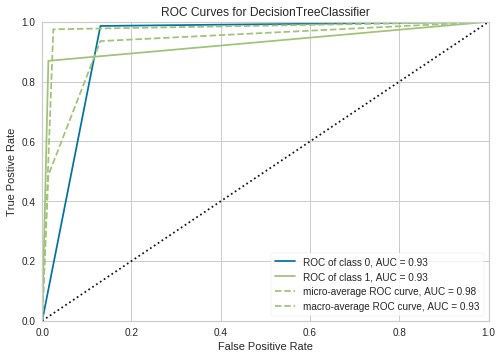

In [54]:
# AUC-ROC plot
classification.plot_model(classification_dt, plot = 'auc')

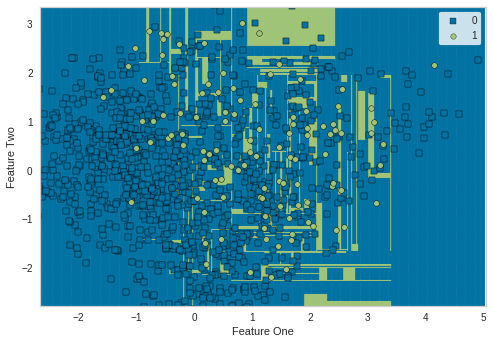

In [55]:
# Decision Boundary
classification.plot_model(classification_dt, plot = 'boundary')

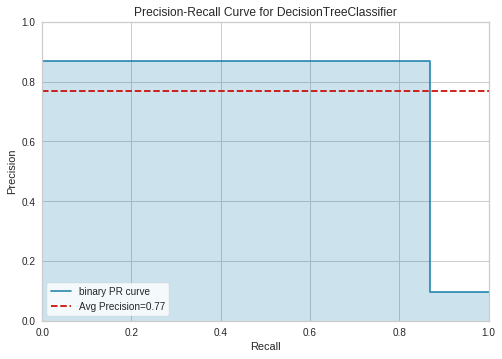

In [56]:
# Precision Recall Curve
classification.plot_model(classification_dt, plot = 'pr')

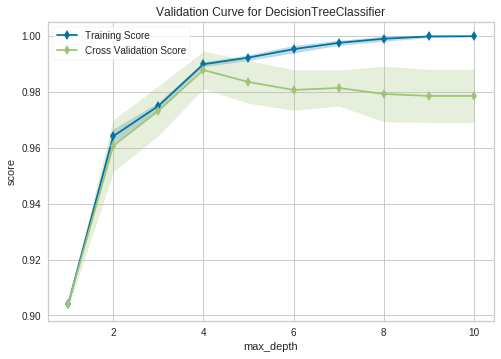

In [57]:
# Validation Curve
classification.plot_model(classification_dt, plot = 'vc')

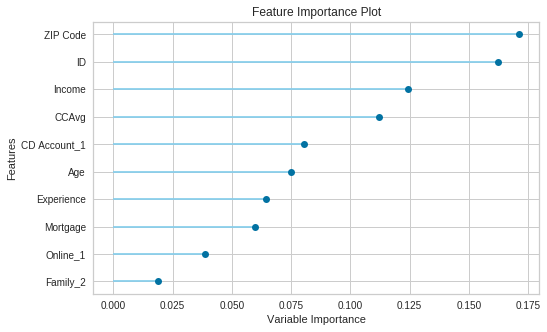

In [26]:
# Dimension Learning
classification.plot_model(classification_dt, plot = 'feature')

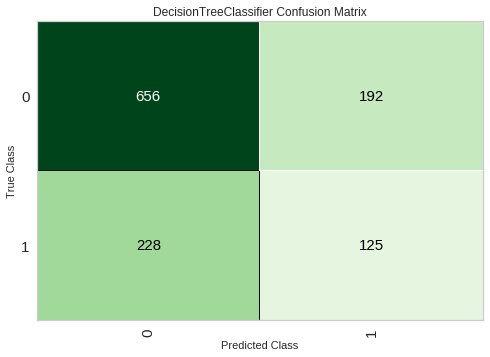

In [27]:
# Confusion Matrix
classification.plot_model(classification_dt, plot = 'confusion_matrix')

In [58]:
classification.evaluate_model(classification_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

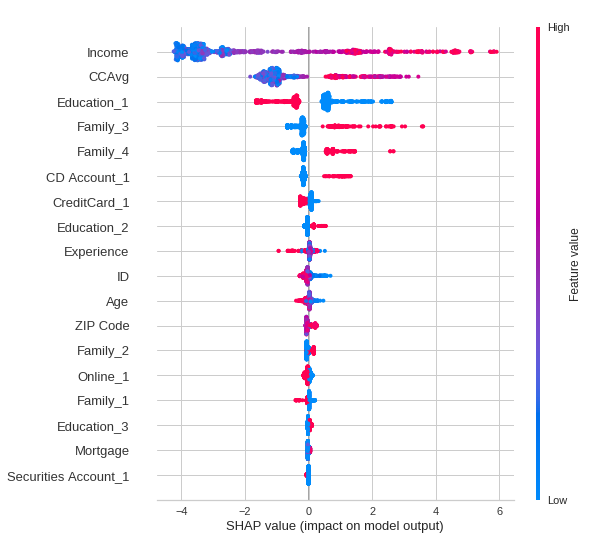

In [59]:
classification.interpret_model(classification_xgb)

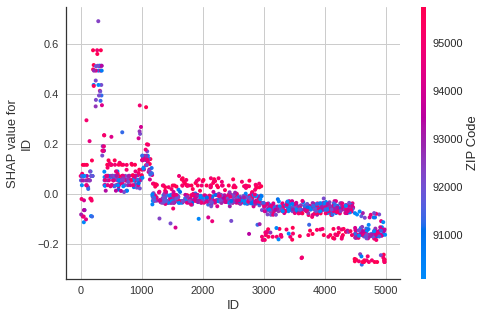

In [60]:
classification.interpret_model(classification_xgb,plot='correlation')

In [61]:
test_data_classification = pd.read_csv('datasets/loan_test_data.csv')

In [62]:
predictions = classification.predict_model(classification_dt, data=test_data_classification)

In [63]:
predictions

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Label,Score
0,118,58,33,61,92833,2,2.3,3,193,0,0,0,1,0,0,0.0
1,1817,45,19,91,92373,2,1.7,2,0,0,1,0,1,0,0,0.0
2,671,23,-1,61,92374,4,2.6,1,239,0,0,0,1,0,0,0.0
3,2994,65,40,20,92647,3,0.1,3,0,0,0,0,0,1,0,0.0
4,3265,67,41,114,95616,4,2.4,3,0,0,0,0,1,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4331,62,37,44,90401,1,1.1,3,0,0,0,0,0,0,0,0.0
996,3221,61,35,28,93302,2,0.2,3,135,0,0,0,1,0,0,0.0
997,1932,28,2,140,92122,2,2.0,1,0,0,0,0,1,0,0,0.0
998,4960,51,27,55,93014,1,1.6,2,197,0,1,0,1,0,0,0.0


In [22]:
classification.save_model(classification_dt, 'decision_tree_1')

Transformation Pipeline and Model Succesfully Saved


In [24]:
dt_model = classification.load_model(model_name='decision_tree_1')

Transformation Pipeline and Model Sucessfully Loaded
